In [1]:
import numpy as np

In [2]:
def greedy(matrix):
    """
        Finds a bipartite matching using Greedy method

        Parameters
        ----------
        matrix : np.array
            An n * n array holding the weights of the respective edges for (rowNumber, columnNumber)

        Returns
        -------
        list
            a list of tuples of format (u,v); u,v E I; where u is a donor and v is a recipient
    """
    currentMatrix = matrix
    matchingPositions = []
    
    # For each row
    for rowNumber in range(currentMatrix.shape[0]):
        
        # find the maximum weight
        columnWithMax = np.where(currentMatrix[rowNumber] == np.max(currentMatrix[rowNumber]))[0][0]
        
        # Add the indices to the answer pairing
        matchingPositions.append((rowNumber, columnWithMax))
        
        # delete that column
 #       currentMatrix[:,columnWithMax] = -sys.maxsize
        currentMatrix[:,columnWithMax] = -99999    # to be replaced with the above line when converting to raw python file
        
        # print(currentMatrix)
        # print("\n\n")
    
    
    return matchingPositions

In [3]:
def output(mat, pos):
    total = 0
    ans_mat = np.zeros((mat.shape[0], mat.shape[1]))
    for i in range(len(pos)):
        total += mat[pos[i][0], pos[i][1]]
        ans_mat[pos[i][0], pos[i][1]] = mat[pos[i][0], pos[i][1]]
    return total, ans_mat



data_matrix = np.array([[82, 83, 69, 92],
            [77, 37, 49, 92],
            [11, 69, 5, 86],
            [8, 9, 98, 23],
            ])

ans_pos = greedy(data_matrix.copy())#Get the element position.
ans, ans_mat = output(data_matrix, ans_pos)#Get the minimum or maximum value and corresponding matrix.
print('The optimal kidney pairs',ans_pos)
#Show the result
# print(f"Linear Assignment problem result: {ans:.0f}\n{ans_mat}")

The optimal kidney pairs [(0, 3), (1, 0), (2, 1), (3, 2)]


# Visualization 1

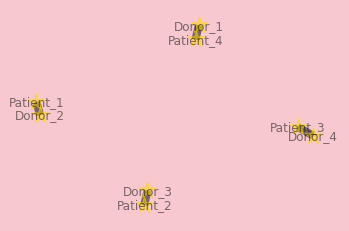

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

donor_list = []
patient_list = []

for row in range(len(data_matrix)):
    Donor = 'Donor_'
    Patient = 'Patient_'
    Donor = Donor+str(row + 1)
    Patient = Patient+str(row + 1)
    donor_list.append(Donor)
    patient_list.append(Patient)

g = nx.Graph()
 
for node in ans_pos:
    g.add_edge(donor_list[node[0]], patient_list[node[1]])

pos = nx.spring_layout(g, seed=3113794652)  # positions for all nodes

labels = {}
for i in donor_list:
    labels[i] = i
    
for i in patient_list:
    labels[i] = i
    
fig, ax = plt.subplots()
nx.draw(g, pos, width=8, alpha=0.5, labels = labels,node_shape='*', font_size=12, font_color="black", node_color='gold',edge_color='black')


ax.set_facecolor('#E17C88')
ax.axis('off')
fig.set_facecolor('#F7C9CE')
plt.show()

# Visualization 2

In [5]:
from pyvis.network import Network

net = Network()

for i in range(len(donor_list)):
    net.add_node(i, label=donor_list[i],color='#3da831')

# i has a value of length of donor_list now
# we need to continue adding nodes with incrementing index from last node of donor 
# We shouldn't be generating node numbers from 1 because it has already been assigned to donor nodes

for i in range(len(patient_list)):
    net.add_node(i + len(patient_list), label=patient_list[i], color = '#3155a8')

for node in ans_pos:
    net.add_edge(int(node[0]), int(node[1]) + len(patient_list),  value=2)

net.repulsion(node_distance=100, spring_length=100)
net.show('node1.html')

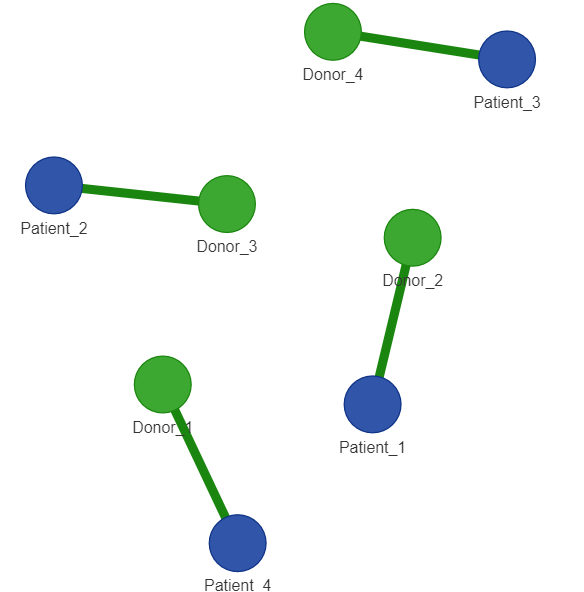